In [1]:
## animate Electric field  

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from scipy import constants
import os
from ReadBinary import *

plt.rcParams["figure.figsize"] = [6, 6]
font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

fileSuffix = "-fp=12.75-gamma=1-lineDistance=1200-fwhmLeft=42-fwhmRight=64-swithTime=0.100000001-res=50"
folder = "../data/GaussianPlasmaCurvedLines-TimeSwitched/"

filename_params = folder+"params{}.param".format(fileSuffix)
params = ReadParamsFile(filename_params)
print(params)

dt_ps = params['dt']/(constants.c/params['unit_length_si'])/constants.pico
dy_um = params['dy']*params['unit_length_si']/constants.micro
dz_um = params['dz']*params['unit_length_si']/constants.micro


filename_E = folder+"E-x{}.data".format(fileSuffix)
filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
filename_pml_r = folder+"pml-r-E-x{}.data".format(fileSuffix)
filename_pml_l = folder+"pml-l-E-x{}.data".format(fileSuffix)
arrayInfo = GetArrayInfo(filename_E)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
print("E shape: ", E.shape)

E_pml_r = None
E_pml_l = None
if os.path.exists(filename_pml_r):
    E_pml_r = GetArrays(filename_pml_r, indStart=0, indEnd=None)[:, 0, :, :]
if os.path.exists(filename_pml_l):
    E_pml_l = GetArrays(filename_pml_l, indStart=0, indEnd=None)[:, 0, :, :]

assert E.shape == Wp2.shape

shape = E.shape[1:]
print("Max E: ", np.max(np.abs(E)))
y_max_um = shape[0]//2*dy_um
z_max_um = shape[1]//2*dz_um

plt.imshow(np.real(Wp2[-1, :,:]), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
#plt.colorbar()
plt.xlabel(r'$z (\mu m)$')
plt.ylabel(r'$y (\mu m)$')
plt.savefig(folder + 'plasma.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

animate = True
save_animation = True

if animate:
    def animate_E(n):
        #E_n = np.concatenate((E_pml_l[n, :,:-1], E[n, :,:-1], E_pml_r[n, :,:]), axis=1)
        E_n = E[n, :,:-1]
        plt.clf()
        fig = plt.imshow(np.real(E_n), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
        plt.colorbar()
        y = np.linspace(-y_max_um, y_max_um, shape[0])
        z = np.linspace(-z_max_um, z_max_um, shape[1])
        Z, Y = np.meshgrid(z, y, indexing='xy')
        plt.contour(Z, Y, np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xlabel(r'$z (\mu m)$')
        plt.ylabel(r'$y (\mu m)$')
        plt.title(r't = {:.3f} ps'.format(n*dt_ps*params['EorWp_entire_sample_rate']))
        plt.pause(0.05)
        
        return fig
    
    if not save_animation:
        plt.ion()
        plt.figure(figsize=(7,6*(shape[0]/shape[1])))

        for n in range(E.shape[0]):
            animate_E(n)
    else:
        fig = plt.figure(figsize=(7,6*(shape[0]/shape[1])))
        anim = animation.FuncAnimation(fig, animate_E, frames=E.shape[0], interval=1, repeat=False)
        anim.save(folder + 'Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)


Populating the interactive namespace from numpy and matplotlib
{'dt': 0.013435029424726963, 'dy': 0.019999999552965164, 'dz': 0.019999999552965164, 'unit_length_si': 0.00012399999832268804, 'lineDistance_in_unitlength': 9.677419662475586, 'radius_left_in_unitlength': 10000.0, 'radius_right_in_unitlength': 1032.258056640625, 'fwhm_left_in_unitlength': 0.33870968222618103, 'fwhm_right_in_unitlength': 0.5161290168762207, 'wp_2p_thz': 12.75, 'gamma_thz': 1.0, 'wp_switch_dt': 0.10000000149011612, 'EorWp_entire_sample_rate': 50, 'er_z_record': -6.800000190734863, 'et_z_record': 6.800000190734863}
typeCode:  1
typeSize:  4
shape:  (1, 600, 690)
numOfArrays:  322
E shape:  (322, 600, 690)
Max E:  1.4872656


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.6/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/usr/lib/python3.6/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/home/nima/.local/lib/python3.6/site-packages/matplotlib/backends/_backend_tk.py", line 88, in _on_timer
    TimerBase._on_timer(self)
  File "/home/nima/.local/lib/python3.6/site-packages/matplotlib/backend_bases.py", line 1373, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/nima/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1481, in _step
    still_going = Animation._step(self, *args)
  File "/home/nima/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1217, in _step
    self._draw_next_frame(framedat

shape:  (16031, 600, 1)
ind_switch :  1030
ind_t_start :  2113


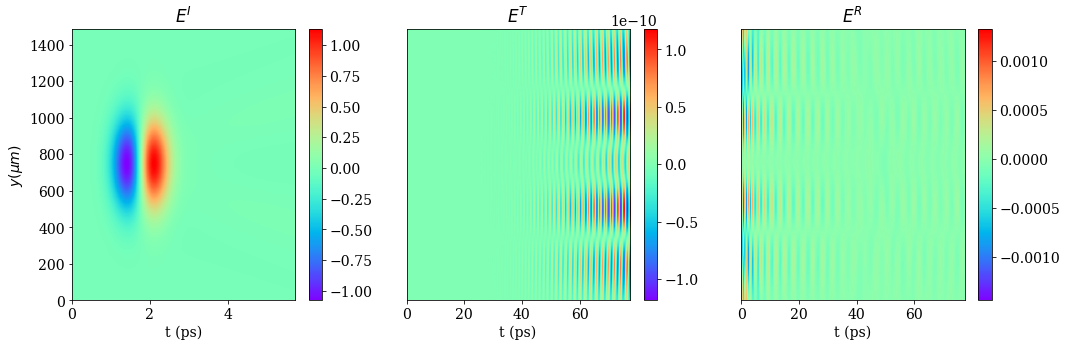

N_pts_t_i :  11
N_pts_y :  16


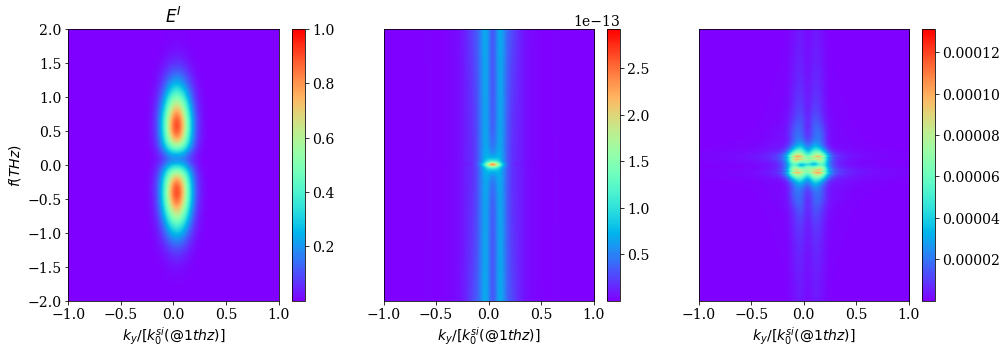

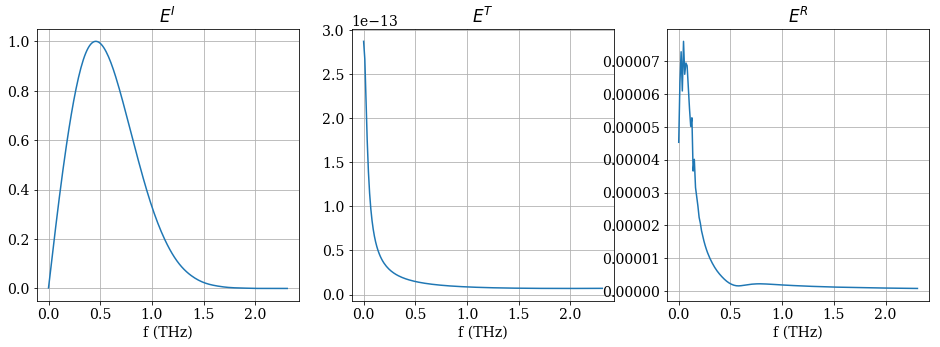

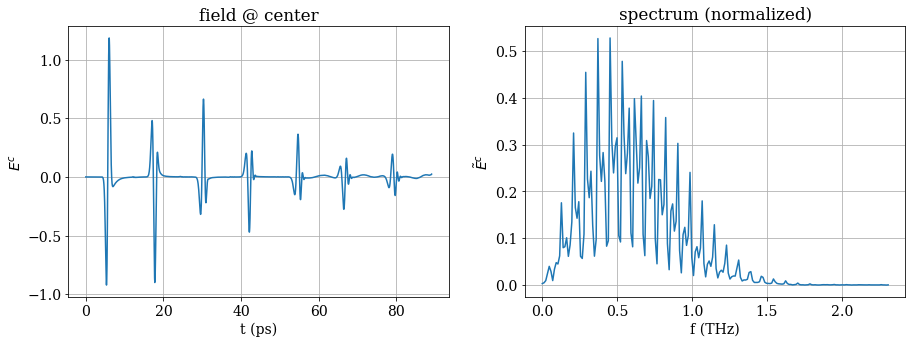

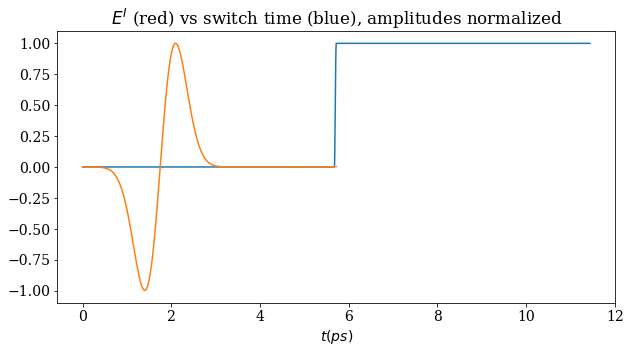

In [2]:
%matplotlib inline
font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)


unitLength = params['unit_length_si']
unitTime = unitLength/constants.c
dt_ps = params['dt']*unitTime/constants.pico
dy_um = params['dy']*unitLength/constants.micro

wp2 = GetArrays(folder+"Wp2-slice-x{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Ei = GetArrays(folder+"Ei-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Et = GetArrays(folder+"Et-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Er = GetArrays(folder+"Er-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Ec = GetArrays(folder+"Ec-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", Et.shape)

shape = Et.shape[1:]
wp2_ty = wp2[:, :, 0]
wp2_t = np.sum(wp2_ty, axis=1)
ind_switch = np.argmax(wp2_t)
Ei_ty = Ei[:, :, 0]
Et_ty = Et[:, :, 0]
Er_ty = Er[:, :, 0]
Ec_ty = Ec[:, :, 0]
ind_t_start = np.argmax(np.abs(np.sum(Et_ty, axis=1)) > 0.0)
print("ind_switch : ", ind_switch)
print("ind_t_start : ", ind_t_start)

Ei_ty_chopped = Ei_ty[:ind_switch, :]
Et_ty_chopped = Et_ty[ind_t_start:, :]
Er_ty_chopped = Er_ty[ind_t_start:, :]

#plt.figure(figsize=(16, 5))
plt.rcParams["figure.figsize"] = [17, 5]
plt.subplot(131)
t_extent = Ei_ty_chopped.shape[0]*dt_ps
y_extent = Ei_ty_chopped.shape[1]*dy_um
plt.imshow(np.real(Ei_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
plt.colorbar()
plt.title(r'$E^I$')
plt.xlabel(r't (ps)')
plt.ylabel(r'$y (\mu m)$')
plt.subplot(132)
t_extent = Et_ty_chopped.shape[0]*dt_ps
plt.imshow(np.real(Et_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
plt.colorbar()
plt.title(r'$E^T$')
plt.xlabel(r't (ps)')
plt.yticks([])
plt.subplot(133)
t_extent = Er_ty_chopped.shape[0]*dt_ps
plt.imshow(np.real(Er_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
plt.colorbar()
plt.title(r'$E^R$')
plt.xlabel(r't (ps)')
plt.yticks([])
plt.savefig(folder + 'E-irt.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

dt = dt_ps*constants.pico
dy = dy_um*constants.micro
Nt_i, Ny = Ei_ty_chopped.shape
df_i = 1/(Nt_i*dt)   ## SI
f_max_thz = 2.0
N_pts_t_i = int(f_max_thz*constants.tera / df_i)

dk_i = 2.0*np.pi/(Ny*dy)    ## dk
k_silicon = 2.0*np.pi*(1.0*constants.tera)/(constants.c/np.sqrt(11.7))
k_max_norm = 1.0    ## at the maximum of the incident spectrum (here f=1thz) k would be 1.0
k_max = k_max_norm*k_silicon
N_pts_y = int(k_max / dk_i)
Ei_f_ty = np.fft.fftshift(np.fft.fft2(Ei_ty_chopped))/((2*np.pi)**2*Nt_i*Ny)
Ei_f_ty = Ei_f_ty[Nt_i//2-N_pts_t_i:Nt_i//2+N_pts_t_i, Ny//2-N_pts_y:Ny//2+N_pts_y]

print('N_pts_t_i : ', N_pts_t_i)
print('N_pts_y : ', N_pts_y)

Nt_tr = Et_ty_chopped.shape[0]
df_tr = 1/(Nt_tr*dt)
N_pts_tr = int(f_max_thz*constants.tera / df_tr)


Et_f_ty = np.fft.fftshift(np.fft.fft2(Et_ty_chopped))/((2*np.pi)**2*Nt_tr*Ny)
Et_f_ty = Et_f_ty[Nt_tr//2-N_pts_tr:Nt_tr//2+N_pts_tr, Ny//2-N_pts_y:Ny//2+N_pts_y]

Er_f_ty = np.fft.fftshift(np.fft.fft2(Er_ty_chopped))/((2*np.pi)**2*Nt_tr*Ny)
Er_f_ty = Er_f_ty[Nt_tr//2-N_pts_tr:Nt_tr//2+N_pts_tr, Ny//2-N_pts_y:Ny//2+N_pts_y]

Ei_f_ty_max = np.max(np.abs(Ei_f_ty))
Ei_f_ty /= Ei_f_ty_max
Er_f_ty /= Ei_f_ty_max
Et_f_ty /= Ei_f_ty_max


interpolation="bicubic"
#plt.figure(figsize=(16, 5))
plt.rcParams["figure.figsize"] = [16, 5]
plt.subplot(131)
plt.imshow(np.abs(Ei_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation,\
           extent=[-k_max_norm, k_max_norm, -f_max_thz, f_max_thz])
plt.colorbar()
plt.title(r'$E^I$')
plt.xlabel(r'$k_y / [k_0^{si}(@ 1thz)]$')
plt.ylabel(r'$f  (THz)$')
plt.subplot(132)
plt.imshow(np.abs(Et_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation,\
           extent=[-k_max_norm, k_max_norm, -f_max_thz, f_max_thz])
plt.yticks([])
plt.colorbar()
plt.xlabel(r'$k_y / [k_0^{si}(@ 1thz)]$')
plt.subplot(133)
plt.imshow(np.abs(Er_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation,\
           extent=[-k_max_norm, k_max_norm, -f_max_thz, f_max_thz])
plt.yticks([])
plt.colorbar()
plt.xlabel(r'$k_y / [k_0^{si}(@ 1thz)]$')
plt.savefig(folder + 'E-irt-spectrum.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

def Get_Temporal_Spectrum(E_t, w_max=6.0, Nw=200):
    w = np.linspace(0, w_max, Nw)

    Nt = len(E_t)
    t = np.linspace(0, Nt*params['dt'], Nt)

    E_f = np.zeros(Nw, dtype=complex)

    for i in range(len(w)):
        w_i = w[i]
        E_f[i] = np.sum(E_t * np.exp(-1j*w_i*t))/Nt
    return w, E_f

Ei_t = np.sum(Ei_ty_chopped, axis=1)/Ei_ty_chopped.shape[1]
Et_t = np.sum(Et_ty_chopped, axis=1)/Et_ty_chopped.shape[1]
Er_t = np.sum(Er_ty_chopped, axis=1)/Er_ty_chopped.shape[1]

w, Ei_f = Get_Temporal_Spectrum(Ei_t)
w, Et_f = Get_Temporal_Spectrum(Et_t)
w, Er_f = Get_Temporal_Spectrum(Er_t)

Ei_f_max = np.max(np.abs(Ei_f))

#pitch = params['pitch_to_unitlength']*unitLength/constants.micro
plt.subplot(131)
plt.plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Ei_f)/Ei_f_max)
plt.xlabel('f (THz)')
plt.title('$E^I$')
plt.grid()
plt.subplot(132)
plt.plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Et_f)/Ei_f_max)
plt.xlabel('f (THz)')
plt.title('$E^T$')
plt.grid()
plt.subplot(133)
plt.plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Er_f)/Ei_f_max)
plt.xlabel('f (THz)')
plt.title('$E^R$')
plt.grid()
plt.savefig(folder + 'E-irt-spectrum_ky=0.png', bbox_inches='tight', pad_inches=0.5)
plt.show()


Ec_t = Ec_ty[:, Ec_ty.shape[1]//2]
w, Ec_f = Get_Temporal_Spectrum(Ec_t)

plt.rcParams["figure.figsize"] = [15, 5]
plt.subplot(121)
plt.plot(np.arange(Ec_t.shape[0])*dt_ps, Ec_t)
plt.title("field @ center")
plt.ylabel(r'$E^c$')
plt.xlabel(r't (ps)')
plt.grid()
plt.subplot(122)
plt.plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Ec_f)/Ei_f_max)
plt.xlabel(r'f (THz)')
plt.ylabel(r'$\tilde{E}^c$')
plt.title("spectrum (normalized)")
plt.grid()
plt.savefig(folder + 'E-center.png', bbox_inches='tight', pad_inches=0.5)
plt.show()


#plt.figure(figsize=(10, 5))
plt.rcParams["figure.figsize"] = [10, 5]
wp2_t = np.sum(wp2_ty[:2*ind_switch], axis=1)
wp2_t /= np.max(np.abs(wp2_t))
Ei_t = np.sum(Ei_ty_chopped, axis=1)
Ei_t /= np.max(np.abs(Ei_t))
t_minToMax_ps = np.abs(np.argmax(Ei_t) - np.argmin(Ei_t))*dt_ps
plt.plot(np.arange(len(wp2_t))*dt_ps, wp2_t)
plt.plot(np.arange(len(Ei_t))*dt_ps, Ei_t)
plt.xlabel(r'$t (ps)$')
plt.title(r'$E^I$ (red) vs switch time (blue), amplitudes normalized')
plt.savefig(folder + 'switchtime.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [3]:
numpy.savetxt(folder+"E_center.csv", Ec_t, delimiter=",")

In [4]:
print(dt_ps)

0.005556989783016515
